<a href="https://colab.research.google.com/github/SandaruwiniGalappaththi/SuperStore/blob/main/Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 38 kB/s 
     |████████████████████████████████| 199 kB 33.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=1647388ba29bd79e793090549ae4ca83b46d497f45968e25b7751782dff110d1
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [2]:
# Import SparkSession
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

# **Data Preprocessing**

### **Importing packages**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Importing superstore dataset**

In [4]:
url = "https://raw.githubusercontent.com/SupunGurusinghe/ML-with-superstore-dataset/main/superstore_data.csv"
superstore_df = pd.read_csv(url ,encoding='windows-1252')
superstore_df

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,NaN,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Suplease,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


### **Creating schema for data set**

In [5]:
from pyspark.sql.types import *

sales_schema = StructType([
    StructField("RowID", IntegerType(), False),
    StructField("OrderID", StringType(), False),
    StructField("OrderDate", StringType(), False, metadata={"desc": "Date of order placed"}),
    StructField("ShipDate", StringType(), False, metadata={"desc": "Date of order shipped"}),
    StructField("ShipMode", StringType(), True, metadata={"desc": "Mode of shipment"}),
    StructField("CustomerID", StringType(), False),
    StructField("CustomerName", StringType(), True),
    StructField("Segment", StringType(), True, metadata={"desc": "Type of the customer"}),
    StructField("Country", StringType(), True),
    StructField("City", StringType(), False),
    StructField("State", StringType(), True),
    StructField("PostalCode", StringType(), True),
    StructField("Region", StringType(), True),
    StructField("ProductID", StringType(), False),
    StructField("Category", StringType(), True),
    StructField("SubCategory", StringType(), True),
    StructField("ProductName", StringType(), True),
    StructField("Sales", FloatType(), False),
    StructField("Quantity", IntegerType(), False),
    StructField("Discount", FloatType(), False),
    StructField("Profit", FloatType(), False),
])

### **Converting to PySpark dataframe**

In [6]:
superstore_df = spark.createDataFrame(superstore_df, sales_schema)
superstore_df.show()

+-----+--------------+----------+----------+--------------+----------+------------------+-----------+-------------+---------------+--------------+----------+-------+---------------+---------------+-----------+--------------------+--------+--------+--------+--------+
|RowID|       OrderID| OrderDate|  ShipDate|      ShipMode|CustomerID|      CustomerName|    Segment|      Country|           City|         State|PostalCode| Region|      ProductID|       Category|SubCategory|         ProductName|   Sales|Quantity|Discount|  Profit|
+-----+--------------+----------+----------+--------------+----------+------------------+-----------+-------------+---------------+--------------+----------+-------+---------------+---------------+-----------+--------------------+--------+--------+--------+--------+
|    1|CA-2016-152156| 11/8/2016|11/11/2016|  Second Class|  CG-12520|       Claire Gute|   Consumer|United States|      Henderson|      Kentucky|     42420|  South|FUR-BO-10001798|            NaN|  

## **Handling null values**

### **Extract customer name and product category by using existing column values**

In [7]:
from pyspark.sql import functions

df_1 = superstore_df.groupBy(superstore_df['CustomerID']).agg(functions.first(superstore_df['CustomerName'], ignorenulls=True))
df_2 = superstore_df.groupBy(superstore_df['ProductID']).agg(functions.first(superstore_df['Category'], ignorenulls=True))

df_1.show()
df_2.show()

+----------+--------------------+
|CustomerID| first(CustomerName)|
+----------+--------------------+
|  AA-10315|          Alex Avila|
|  AA-10375|        Allen Armold|
|  AA-10480|        Andrew Allen|
|  AA-10645|       Anna Andreadi|
|  AB-10015|       Aaron Bergman|
|  AB-10060|     Adam Bellavance|
|  AB-10105|       Adrian Barton|
|  AB-10150|         Aimee Bixby|
|  AB-10165|         Alan Barnes|
|  AB-10255|Alejandro Ballentine|
|  AB-10600|           Ann Blume|
|  AC-10420|       Alyssa Crouse|
|  AC-10450|             Amy Cox|
|  AC-10615|           Ann Chong|
|  AC-10660|          Anna Chung|
|  AD-10180|      Alan Dominguez|
|  AF-10870|        Art Ferguson|
|  AF-10885|          Art Foster|
|  AG-10270|     Alejandro Grove|
|  AG-10300| Aleksandra Gannaway|
+----------+--------------------+
only showing top 20 rows

+---------------+---------------+
|      ProductID|first(Category)|
+---------------+---------------+
|FUR-BO-10000112|      Furniture|
|FUR-BO-10000330|     

### **Join with newly extracted column values**

In [8]:
df = superstore_df.select('RowID', 'OrderID','OrderDate', 'ShipDate', 'ShipMode', 'CustomerID','Segment','Country', 'City', 'State', 'PostalCode', 'Region', 'ProductID', 'SubCategory', 'ProductName', 'Sales', 'Quantity', 'Discount', 'Profit' )
df = df_1.join(df, 'CustomerID')
df.show()

+----------+-------------------+-----+--------------+----------+----------+--------------+---------+-------------+-------------+------------+----------+-------+---------------+-----------+--------------------+-------+--------+--------+--------+
|CustomerID|first(CustomerName)|RowID|       OrderID| OrderDate|  ShipDate|      ShipMode|  Segment|      Country|         City|       State|PostalCode| Region|      ProductID|SubCategory|         ProductName|  Sales|Quantity|Discount|  Profit|
+----------+-------------------+-----+--------------+----------+----------+--------------+---------+-------------+-------------+------------+----------+-------+---------------+-----------+--------------------+-------+--------+--------+--------+
|  VW-21775|    Victoria Wilson|  213|CA-2015-146262|  1/2/2015|  1/9/2015|Standard Class|Corporate|United States|       Medina|        Ohio|     44256|   East|OFF-LA-10004544|     Labels|           Avery 505|  23.68|       2|     0.2|    8.88|
|  VW-21775|    Vict

In [9]:
df = df_2.join(df, 'ProductID')
df.show()

+---------------+---------------+----------+-------------------+-----+--------------+----------+----------+--------------+---------+-------------+-------------+------------+----------+-------+-----------+--------------------+-------+--------+--------+--------+
|      ProductID|first(Category)|CustomerID|first(CustomerName)|RowID|       OrderID| OrderDate|  ShipDate|      ShipMode|  Segment|      Country|         City|       State|PostalCode| Region|SubCategory|         ProductName|  Sales|Quantity|Discount|  Profit|
+---------------+---------------+----------+-------------------+-----+--------------+----------+----------+--------------+---------+-------------+-------------+------------+----------+-------+-----------+--------------------+-------+--------+--------+--------+
|OFF-LA-10004544|Office Supplies|  VW-21775|    Victoria Wilson|  213|CA-2015-146262|  1/2/2015|  1/9/2015|Standard Class|Corporate|United States|       Medina|        Ohio|     44256|   East|     Labels|           Av

### **Change column names and order them by `RowID`**

In [10]:
df = df.select('RowID', 'OrderID','OrderDate', 'ShipDate', 'ShipMode', 'CustomerID', 'first(CustomerName)', 'Segment','Country', 'City', 'State', 'PostalCode', 'Region', 'ProductID', 'first(Category)', 'SubCategory', 'ProductName', 'Sales', 'Quantity', 'Discount', 'Profit' ).orderBy('RowID').withColumnRenamed("first(CustomerName)","CustomerName").withColumnRenamed("first(Category)","Category")
df.show()

+-----+--------------+----------+----------+--------------+----------+------------------+-----------+-------------+---------------+--------------+----------+-------+---------------+---------------+-----------+--------------------+--------+--------+--------+--------+
|RowID|       OrderID| OrderDate|  ShipDate|      ShipMode|CustomerID|      CustomerName|    Segment|      Country|           City|         State|PostalCode| Region|      ProductID|       Category|SubCategory|         ProductName|   Sales|Quantity|Discount|  Profit|
+-----+--------------+----------+----------+--------------+----------+------------------+-----------+-------------+---------------+--------------+----------+-------+---------------+---------------+-----------+--------------------+--------+--------+--------+--------+
|    1|CA-2016-152156| 11/8/2016|11/11/2016|  Second Class|  CG-12520|       Claire Gute|   Consumer|United States|      Henderson|      Kentucky|     42420|  South|FUR-BO-10001798|            NaN|  

### **Setting defaults value for null values**


In [11]:
df = df.na.fill({
    "ShipMode": "EMPTY",
    "Segment": "EMPTY",
    "Country": "EMPTY",
    "PostalCode": "EMPTY",
    "Region": "EMPTY",
    "Segment": "EMPTY",
    "SubCategory": "EMPTY",
    "ProductName": "EMPTY",
})

df.show()

+-----+--------------+----------+----------+--------------+----------+------------------+-----------+-------------+---------------+--------------+----------+-------+---------------+---------------+-----------+--------------------+--------+--------+--------+--------+
|RowID|       OrderID| OrderDate|  ShipDate|      ShipMode|CustomerID|      CustomerName|    Segment|      Country|           City|         State|PostalCode| Region|      ProductID|       Category|SubCategory|         ProductName|   Sales|Quantity|Discount|  Profit|
+-----+--------------+----------+----------+--------------+----------+------------------+-----------+-------------+---------------+--------------+----------+-------+---------------+---------------+-----------+--------------------+--------+--------+--------+--------+
|    1|CA-2016-152156| 11/8/2016|11/11/2016|  Second Class|  CG-12520|       Claire Gute|   Consumer|United States|      Henderson|      Kentucky|     42420|  South|FUR-BO-10001798|            NaN|  

### **Convert to a pandas DataFrame**

In [12]:
df = df.toPandas()
df

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,NaN,Bookcases,Bush Somerset Collection Bookcase,261.959991,2,0.00,41.913601
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940002,3,0.00,219.582001
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620000,2,0.00,6.871400
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577515,5,0.45,-383.031006
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Suplease,Storage,Eldon Fold 'N Roll Cart System,22.368000,2,0.20,2.516400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.247999,3,0.20,4.102800
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.959999,2,0.00,15.633200
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.575989,2,0.20,19.393200
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600000,4,0.00,13.320000


## **Handling spelling mistakes**

In [13]:
df.Category.value_counts()

Office Supplies    5987
Furniture          2118
Technology         1836
NaN                  30
Office Suplease      23
Name: Category, dtype: int64

In [14]:
df.loc[df.Category == 'Office Suplease' , 'Category'] = 'Office Supplies'

In [15]:
df.Category.value_counts()

Office Supplies    6010
Furniture          2118
Technology         1836
NaN                  30
Name: Category, dtype: int64

## **Duplicates Handling**

In [16]:
df.shape

(9994, 21)

In [17]:
df.duplicated().sum()

0

In [18]:
df.loc[df.duplicated(keep = False)]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit


In [19]:
df.loc[df.duplicated(subset = ['OrderID','CustomerID','ProductID'],keep = False)]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
26,27,CA-2016-121755,1/16/2016,1/20/2016,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570000,3,0.0,11.774100
50,51,CA-2016-121755,1/16/2016,1/20/2016,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570000,6,0.0,11.774100
350,351,CA-2016-129714,9/1/2016,9/3/2016,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,...,10009,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,24.559999,2,0.0,11.543200
352,353,CA-2016-129714,9/1/2016,9/3/2016,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,...,10009,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,49.119999,4,0.0,23.086399
430,431,US-2016-123750,4/15/2016,4/21/2016,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,...,28052,South,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,408.743988,7,0.2,76.639503
431,432,US-2016-123750,4/15/2016,4/21/2016,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,...,28052,South,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,291.959991,5,0.2,54.742500
566,567,CA-2017-156951,10/1/2017,10/8/2017,Standard Class,EB-13840,Ellis Ballard,Corporate,United States,Seattle,...,98105,West,OFF-PA-10004530,Office Supplies,Paper,Personal Creations Ink Jet Cards and Labels,91.839996,8,0.0,45.001598
695,696,CA-2017-156951,10/1/2017,10/8/2017,Standard Class,EB-13840,Ellis Ballard,Corporate,United States,Seattle,...,98105,West,OFF-PA-10004530,Office Supplies,Paper,Personal Creations Ink Jet Cards and Labels,91.839996,4,0.0,45.001598
750,751,CA-2017-126074,10/2/2017,10/6/2017,Standard Class,RF-19735,Roland Fjeld,Consumer,United States,Trenton,...,48183,Central,FUR-FU-10003577,Furniture,Furnishings,Nu-Dell Leatherette Frames,157.740005,11,0.0,56.786400
876,877,CA-2017-126074,10/2/2017,10/6/2017,Standard Class,RF-19735,Roland Fjeld,Consumer,United States,Trenton,...,48183,Central,FUR-FU-10003577,Furniture,Furnishings,Nu-Dell Leatherette Frames,157.740005,1,0.0,56.786400


In [20]:
df.drop_duplicates(subset = ['OrderID','CustomerID','ProductID'], keep = 'last', inplace=True)

In [21]:
df.loc[df.duplicated(subset = ['OrderID','CustomerID','ProductID'],keep = False)]

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit


In [22]:
df.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,NaN,Bookcases,Bush Somerset Collection Bookcase,261.959991,2,0.00,41.913601
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940002,3,0.00,219.582001
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620000,2,0.00,6.871400
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577515,5,0.45,-383.031006
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000,2,0.20,2.516400


## **Handling Fixed Bounds**

##Sales are bounded for positive values

##Therefore checking whether having negative values for sales

In [23]:
(df.Sales < 0).any()

False

##Quantity is bounded for positive values

##Therefore checking whether having negative values for quantity

In [24]:
(df.Quantity < 0).any()

False

##Profit is usually bounded by positive values

##Therefore checking whether having negative values for profit



In [25]:
(df.Profit < 0).any()

True

##We can consider negative profits to represent the loss

In [26]:
df.query('Profit < 0')

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577515,5,0.45,-383.031006
14,15,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.809998,5,0.80,-123.858002
15,16,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544000,3,0.80,-3.816000
23,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372002,2,0.30,-1.019600
27,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.429932,7,0.50,-1665.052246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,9921,CA-2016-149272,3/15/2016,3/19/2016,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,...,77803,Central,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.386000,7,0.80,-35.817600
9921,9922,CA-2014-111360,11/24/2014,11/30/2014,Standard Class,AT-10435,Alyssa Tate,Home Office,United States,Akron,...,44312,East,OFF-BI-10003350,Office Supplies,Binders,Acco Expandable Hanging Binders,5.742000,3,0.70,-4.593600
9931,9932,CA-2015-104948,11/13/2015,11/17/2015,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Bernardino,...,92404,West,FUR-BO-10004357,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.331970,4,0.15,-40.195999
9937,9938,CA-2016-164889,6/3/2016,6/6/2016,Second Class,CP-12340,Christine Phan,Corporate,United States,Los Angeles,...,90049,West,FUR-TA-10001676,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.087997,2,0.20,-1.777200


##Discount is bounded for positive values

##Therefore checking whether having negative values for Discount

In [27]:
(df.Discount < 0).any()

True

In [28]:
len(df.query('Discount < 0'))

17

##There are 17 negative values for discount.

##It is probably a mistake.

In [29]:
df.query('Discount < 0')

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
1173,1174,US-2015-104430,10/22/2015,10/26/2015,Standard Class,LT-17110,Liz Thompson,Consumer,United States,Bloomington,...,61701,Central,OFF-BI-10000301,Office Supplies,Binders,GBC Instant Report Kit,5.176000,4,-0.8,-7.764000
1271,1272,US-2016-103646,4/21/2016,4/26/2016,Standard Class,SP-20545,Sibella Parks,Corporate,United States,Chicago,...,60623,Central,OFF-AP-10004487,Office Supplies,Appliances,Kensington 4 Outlet MasterPiece Compact Power ...,48.792000,3,-0.8,-126.859200
1284,1285,US-2015-149692,12/6/2015,12/12/2015,Standard Class,KW-16435,Katrina Willman,Consumer,United States,Austin,...,78745,Central,OFF-BI-10002813,Office Supplies,Binders,Avery Reinforcements for Hole-Punch Pages,2.772000,7,-0.8,-4.851000
1332,1333,CA-2014-122567,2/16/2014,2/21/2014,Standard Class,MN-17935,Michael Nguyen,Consumer,United States,Dallas,...,75220,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,1.080000,3,-0.8,-1.728000
1513,1514,CA-2017-112809,8/18/2017,8/22/2017,Standard Class,RA-19915,Russell Applegate,Consumer,United States,Dallas,...,75220,Central,OFF-BI-10001098,Office Supplies,Binders,Acco D-Ring Binder w/DublLock,21.379999,5,-0.8,-33.139000
1770,1771,CA-2017-146024,3/2/2017,3/8/2017,Standard Class,SC-20770,Stewart Carmichael,Corporate,United States,Dallas,...,75081,Central,OFF-BI-10003291,Office Supplies,Binders,Wilson Jones Leather-Like Binders with DublLoc...,12.222000,7,-0.8,-20.166300
1818,1819,US-2014-130379,5/25/2014,5/29/2014,Standard Class,JL-15235,Janet Lee,Consumer,United States,Chicago,...,60623,Central,OFF-AP-10001394,Office Supplies,Appliances,Harmony Air Purifier,75.599998,2,-0.8,-166.320007
1820,1821,CA-2016-168956,2/16/2016,2/20/2016,Standard Class,EA-14035,Erin Ashbrook,Corporate,United States,Chicago,...,60623,Central,OFF-AP-10004233,Office Supplies,Appliances,Honeywell Enviracaire Portable Air Cleaner for...,92.064003,6,-0.8,-225.556793
1857,1858,US-2017-158218,5/12/2017,5/15/2017,Second Class,AC-10420,Alyssa Crouse,Corporate,United States,Houston,...,77041,Central,OFF-BI-10002133,Office Supplies,Binders,"Wilson Jones Elliptical Ring 3 1/2"" Capacity B...",34.240002,4,-0.8,-53.071999
1943,1944,CA-2017-144064,8/29/2017,9/1/2017,First Class,CP-12085,Cathy Prescott,Corporate,United States,Quincy,...,62301,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.240000,9,-0.8,-5.184000


In [30]:
neg_Discount = df[df.Discount < 0]
neg_Discount

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
1173,1174,US-2015-104430,10/22/2015,10/26/2015,Standard Class,LT-17110,Liz Thompson,Consumer,United States,Bloomington,...,61701,Central,OFF-BI-10000301,Office Supplies,Binders,GBC Instant Report Kit,5.176000,4,-0.8,-7.764000
1271,1272,US-2016-103646,4/21/2016,4/26/2016,Standard Class,SP-20545,Sibella Parks,Corporate,United States,Chicago,...,60623,Central,OFF-AP-10004487,Office Supplies,Appliances,Kensington 4 Outlet MasterPiece Compact Power ...,48.792000,3,-0.8,-126.859200
1284,1285,US-2015-149692,12/6/2015,12/12/2015,Standard Class,KW-16435,Katrina Willman,Consumer,United States,Austin,...,78745,Central,OFF-BI-10002813,Office Supplies,Binders,Avery Reinforcements for Hole-Punch Pages,2.772000,7,-0.8,-4.851000
1332,1333,CA-2014-122567,2/16/2014,2/21/2014,Standard Class,MN-17935,Michael Nguyen,Consumer,United States,Dallas,...,75220,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,1.080000,3,-0.8,-1.728000
1513,1514,CA-2017-112809,8/18/2017,8/22/2017,Standard Class,RA-19915,Russell Applegate,Consumer,United States,Dallas,...,75220,Central,OFF-BI-10001098,Office Supplies,Binders,Acco D-Ring Binder w/DublLock,21.379999,5,-0.8,-33.139000
1770,1771,CA-2017-146024,3/2/2017,3/8/2017,Standard Class,SC-20770,Stewart Carmichael,Corporate,United States,Dallas,...,75081,Central,OFF-BI-10003291,Office Supplies,Binders,Wilson Jones Leather-Like Binders with DublLoc...,12.222000,7,-0.8,-20.166300
1818,1819,US-2014-130379,5/25/2014,5/29/2014,Standard Class,JL-15235,Janet Lee,Consumer,United States,Chicago,...,60623,Central,OFF-AP-10001394,Office Supplies,Appliances,Harmony Air Purifier,75.599998,2,-0.8,-166.320007
1820,1821,CA-2016-168956,2/16/2016,2/20/2016,Standard Class,EA-14035,Erin Ashbrook,Corporate,United States,Chicago,...,60623,Central,OFF-AP-10004233,Office Supplies,Appliances,Honeywell Enviracaire Portable Air Cleaner for...,92.064003,6,-0.8,-225.556793
1857,1858,US-2017-158218,5/12/2017,5/15/2017,Second Class,AC-10420,Alyssa Crouse,Corporate,United States,Houston,...,77041,Central,OFF-BI-10002133,Office Supplies,Binders,"Wilson Jones Elliptical Ring 3 1/2"" Capacity B...",34.240002,4,-0.8,-53.071999
1943,1944,CA-2017-144064,8/29/2017,9/1/2017,First Class,CP-12085,Cathy Prescott,Corporate,United States,Quincy,...,62301,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.240000,9,-0.8,-5.184000


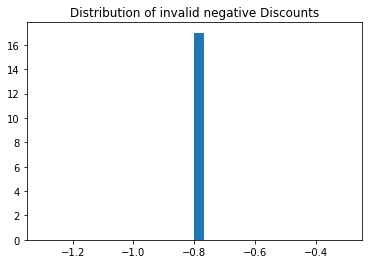

In [31]:
plt.hist(neg_Discount.Discount, bins=30)
plt.title("Distribution of invalid negative Discounts");

In [32]:
neg_Discount.Discount.value_counts()

-0.8    17
Name: Discount, dtype: int64

In [33]:
toBeRemove = df[(df['Discount'] == -0.8)].index
df.drop(toBeRemove , inplace=True)
toBeRemove

Int64Index([1173, 1271, 1284, 1332, 1513, 1770, 1818, 1820, 1857, 1943, 1972,
            1995, 2004, 2106, 2137, 2159, 2167],
           dtype='int64')

In [34]:
df.query('Discount < 0')

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit


##After considering negative discount values we can conclude that,

###1. There is only one negative discount value which is -0.8.

###2. Total count of orders is 9994. Among 9994 orders 17 negative discount values are *negligible*.

###3. Therefore we can drop those rows from dataset.

## **Remove Outliers**

In [35]:
#Boxplot
def plot_boxplot(df , ft):
  df.boxplot(column = [ft])
  plt.grid(False)
  plt.show()

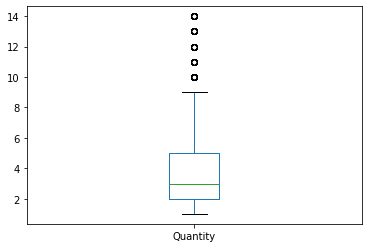

In [36]:
plot_boxplot(df, 'Quantity')

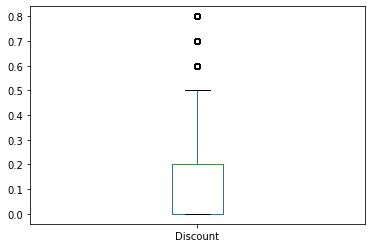

In [37]:
plot_boxplot(df , 'Discount')

In [38]:
# IQR = Q3-Q1

def outliers(df , ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3-Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]

  return ls

In [39]:
outlier_indexes = []
for feature in ['Quantity' , 'Discount']:
  outlier_indexes.extend(outliers(df , feature))

In [40]:
len(outlier_indexes)

1007

In [41]:
def remove(df , ls):
  ls = sorted(set(ls))
  df = df.drop(ls)

  return df

In [42]:
dataset_new =remove(df , outlier_indexes)

In [43]:
dataset_new.shape

(8970, 21)

In [44]:
df.shape

(9965, 21)

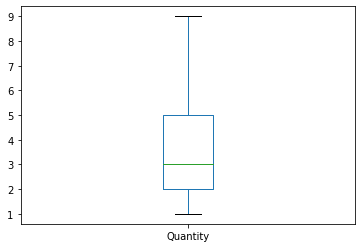

In [45]:
plot_boxplot(dataset_new , 'Quantity')

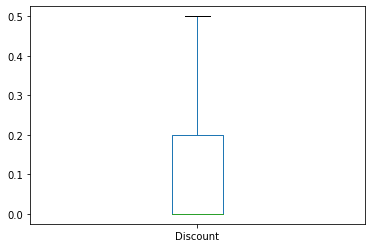

In [46]:
plot_boxplot(dataset_new , 'Discount')

In [47]:
df = dataset_new

In [48]:
df

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,NaN,Bookcases,Bush Somerset Collection Bookcase,261.959991,2,0.00,41.913601
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940002,3,0.00,219.582001
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620000,2,0.00,6.871400
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577515,5,0.45,-383.031006
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000,2,0.20,2.516400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.247999,3,0.20,4.102800
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.959999,2,0.00,15.633200
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.575989,2,0.20,19.393200
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600000,4,0.00,13.320000


In [53]:
from sklearn.preprocessing import normalize
numeric_df = df[['Sales','Quantity','Discount','Profit']].copy()
data_scaled = normalize(numeric_df)
data_scaled = pd.DataFrame(data_scaled, columns=numeric_df.columns)
data_scaled

,Sales,Quantity,Discount,Profit
0,0.987413,0.007539,0.000000,0.157986
1,0.957819,0.003926,0.000000,0.287346
2,0.898166,0.122868,0.000000,0.422138
3,0.928466,0.004848,0.000436,-0.371386
4,0.989793,0.088501,0.008850,0.111352
...,...,...,...,...
8965,0.980304,0.116481,0.007765,0.159299
8966,0.985629,0.021436,0.000000,0.167557
8967,0.997169,0.007713,0.000771,0.074788
8968,0.905075,0.122307,0.000000,0.407284


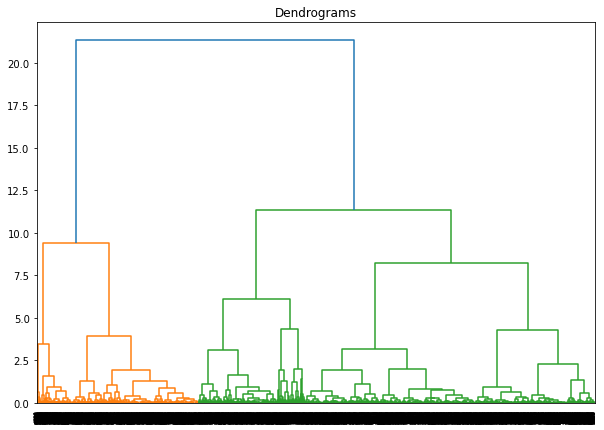

In [54]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

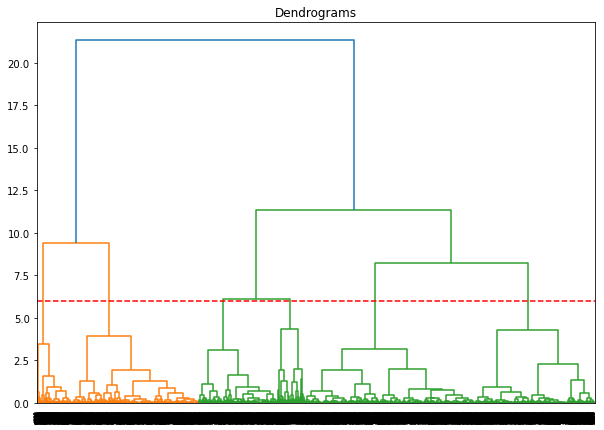

In [60]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [61]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
f1 = cluster.fit_predict(data_scaled)
print(f1)

[4 4 2 ... 1 2 4]


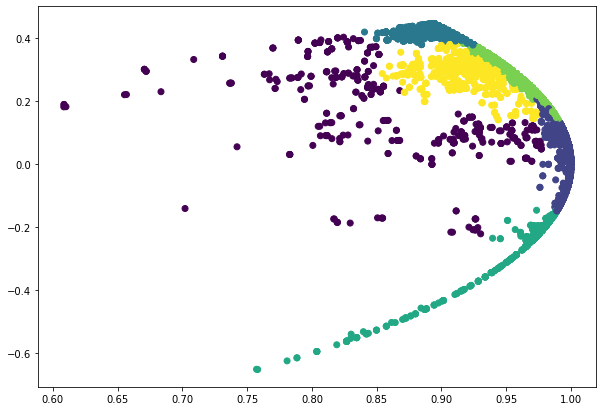

In [67]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Sales'], data_scaled['Profit'], c=cluster.labels_) 

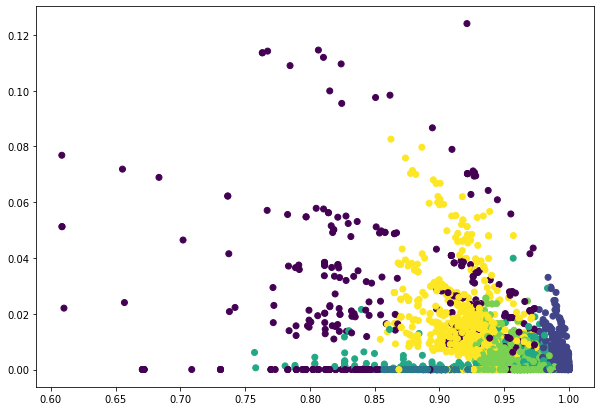

In [68]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Sales'], data_scaled['Discount'], c=cluster.labels_) 

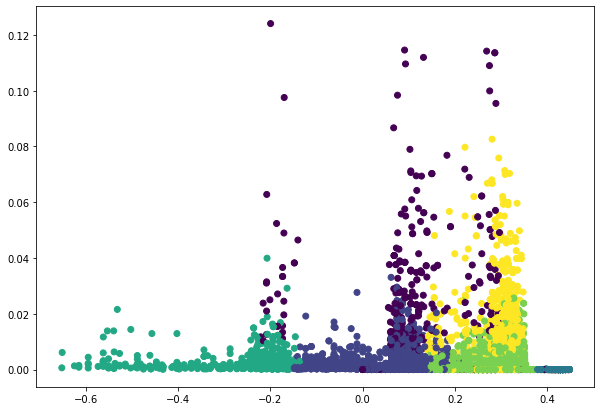

In [69]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Profit'], data_scaled['Discount'], c=cluster.labels_) 

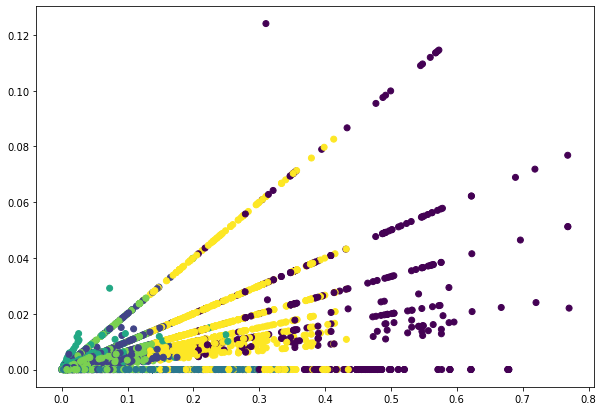

In [73]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Quantity'], data_scaled['Discount'], c=cluster.labels_) 